In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import seaborn as sns

In [ ]:
#Loading cleaned csv files
Customer_data = pd.read_csv("C:\\Users\\haris\\Downloads\\Customers_cleaned.csv")
Exchange_rate = pd.read_csv("C:\\Users\\haris\\Downloads\\Exchange_Rates.csv")
Products_data = pd.read_csv("C:\\Users\\haris\\Downloads\\Products_cleaned.csv")
Sales_data = pd.read_csv("C:\\Users\\haris\\Downloads\\Sales_cleaned.csv")
Stores_data = pd.read_csv("C:\\Users\\haris\\Downloads\\Stores_cleaned.csv")
product_sales_data = pd.read_csv("C:\\Users\\haris\\Downloads\\Products_Sales.csv")
customer_sales_product_stores_data = pd.read_csv("C:\\Users\\haris\\Downloads\\Customer_Sales_Products_Stores.csv")


Data Visualization


Text(0.5, 1.0, 'Gender Distribution')

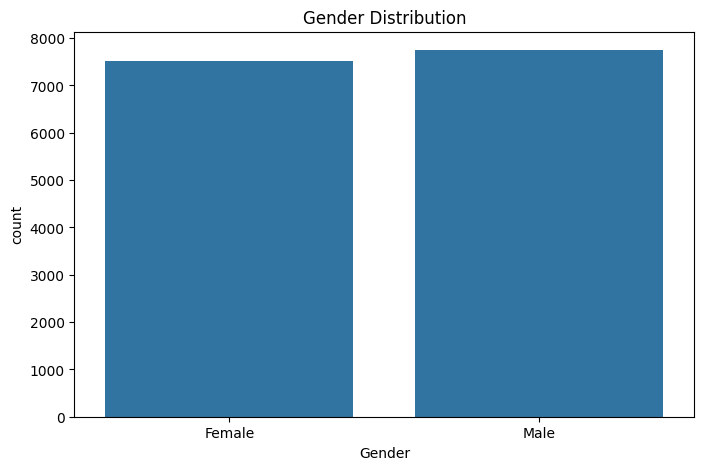

In [7]:
#plotting gender distribution graph
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', data=Customer_data)
plt.title('Gender Distribution')

In [ ]:
# Calculate age from the 'Birthday' column
Customer_data['Age'] = pd.to_datetime('today').year - pd.to_datetime(Customer_data['Birthday']).dt.year

#plotting graph against gender distribution by male and female customers
male_count = Customer_data[Customer_data['Gender'] == 'M'].shape[0]
female_count = Customer_data[Customer_data['Gender'] == 'F'].shape[0]

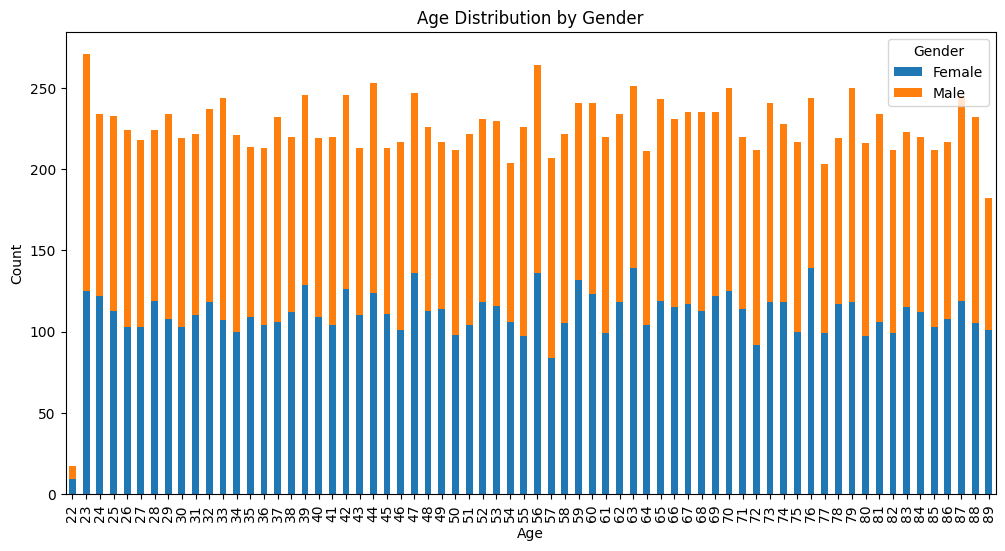

In [13]:
# Group by age and gender, then count the number of occurrences
age_gender_distribution = Customer_data.groupby(['Age', 'Gender']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 6))
age_gender_distribution.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

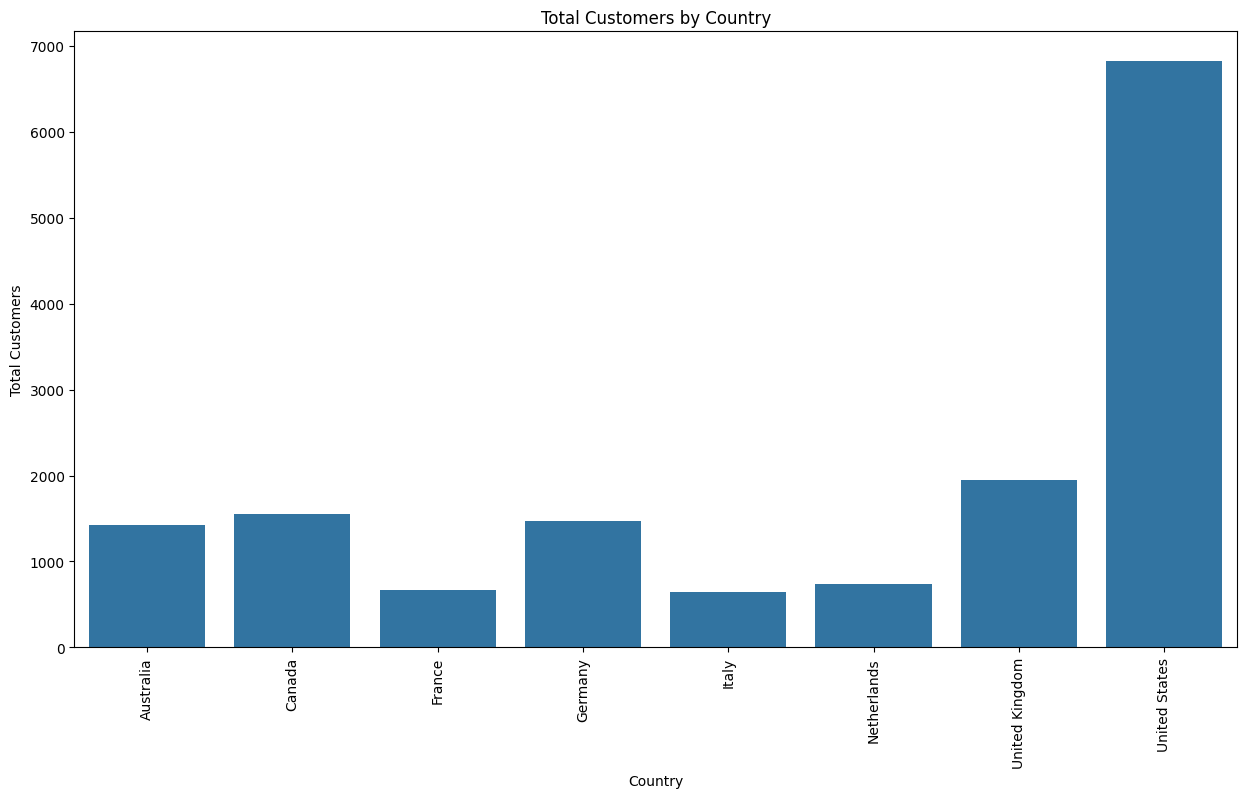

In [16]:
# Group by country and count the number of customers
customer_by_country = Customer_data.groupby('Country').size().reset_index(name='Total_Customers')

# Plot the data
plt.figure(figsize=(15, 8))
sns.barplot(x='Country', y='Total_Customers', data=customer_by_country)
plt.title('Total Customers by Country')
plt.xlabel('Country')
plt.ylabel('Total Customers')
plt.xticks(rotation=90)
plt.show()

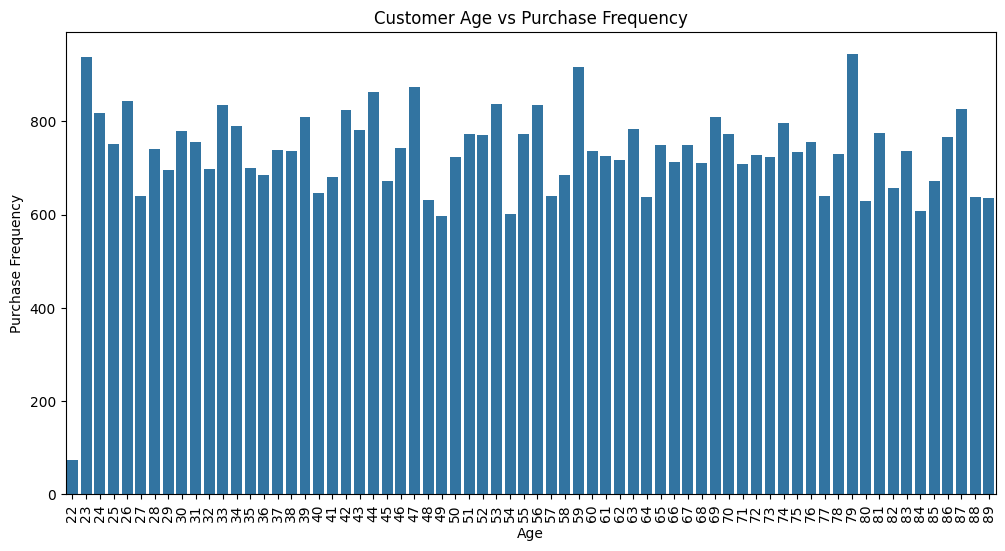

In [18]:
# Calculate age from the 'Birthday' column if it exists
if 'Birthday' in customer_sales_product_stores_data.columns:
	customer_sales_product_stores_data['Age'] = pd.to_datetime('today').year - pd.to_datetime(customer_sales_product_stores_data['Birthday']).dt.year

# Group by age and count the number of purchases
age_purchase_frequency = customer_sales_product_stores_data.groupby('Age').size().reset_index(name='Purchase_Frequency')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Purchase_Frequency', data=age_purchase_frequency)
plt.title('Customer Age vs Purchase Frequency')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=90)
plt.show()

C:\Users\haris\AppData\Local\Temp\ipykernel_8628\1502116986.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Category', data=top_categories, palette='viridis')


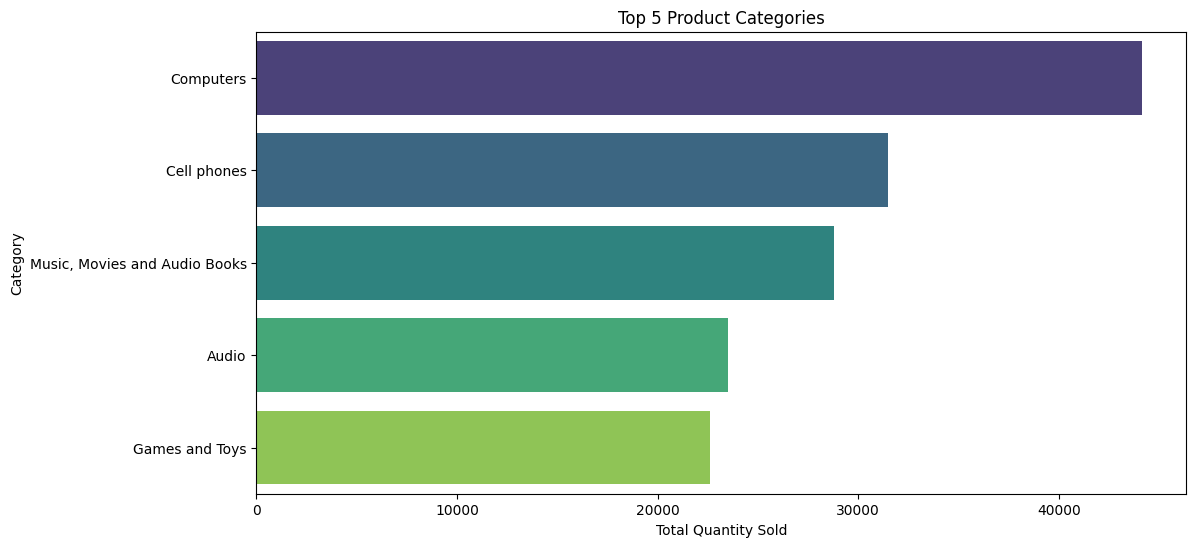

In [22]:
# Aggregate sales data by category
top_categories = product_sales_data.groupby('Category')['Quantity'].sum().reset_index()

# Sort the categories by quantity sold in descending order and select the top 5
top_categories = top_categories.sort_values(by='Quantity', ascending=False).head(5)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Category', data=top_categories, palette='viridis')
plt.title('Top 5 Product Categories')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Category')
plt.show()

C:\Users\haris\AppData\Local\Temp\ipykernel_8628\1706084740.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Product Name', data=top_selling_products, palette='viridis')


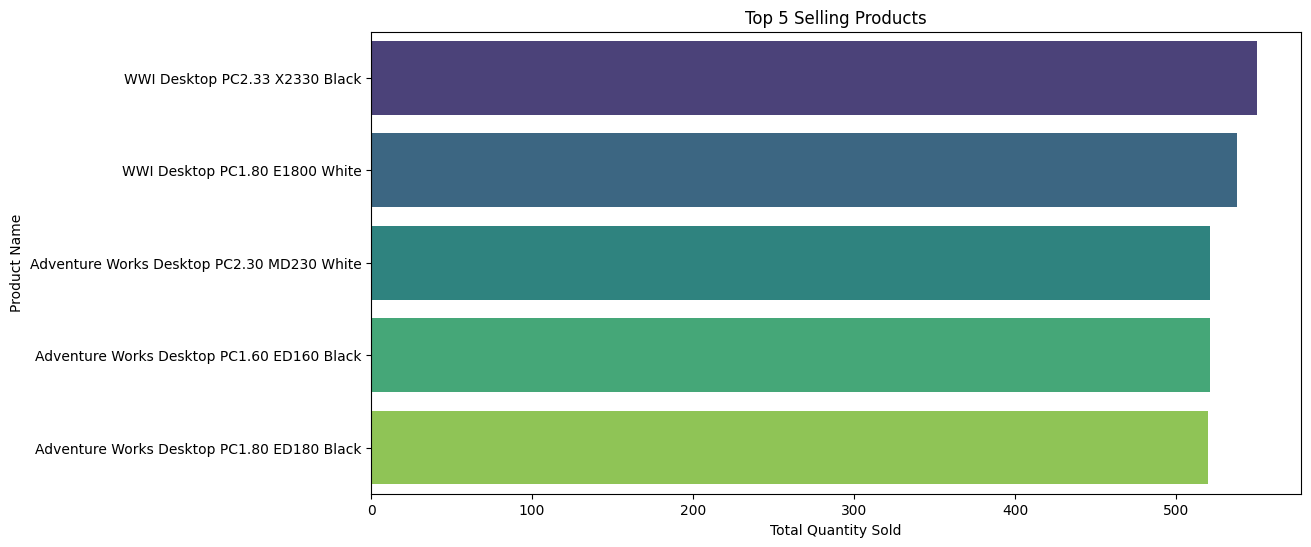

In [20]:
# Aggregate sales data by product
top_selling_products = product_sales_data.groupby('Product Name')['Quantity'].sum().reset_index()

# Sort the products by quantity sold in descending order and select the top 5
top_selling_products = top_selling_products.sort_values(by='Quantity', ascending=False).head(5)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Product Name', data=top_selling_products, palette='viridis')
plt.title('Top 5 Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()

C:\Users\haris\AppData\Local\Temp\ipykernel_8628\395087446.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = Sales_data.set_index('Order Date').resample('M').size()


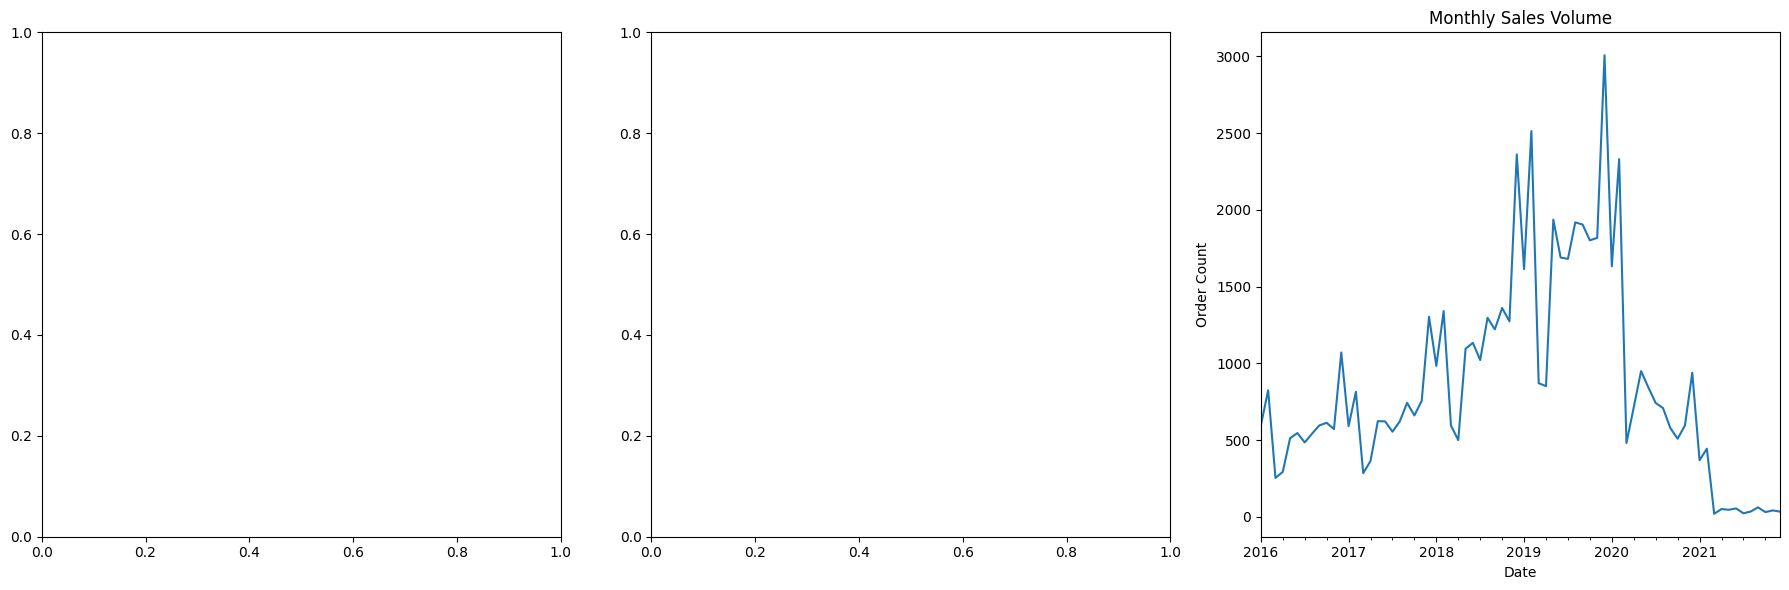

In [27]:
# Create a figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

Sales_data['Order Date'] = pd.to_datetime(Sales_data['Order Date'])
monthly_sales = Sales_data.set_index('Order Date').resample('M').size()
monthly_sales.plot(ax=axes[2])
axes[2].set_title('Monthly Sales Volume')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Order Count')

plt.tight_layout()
plt.show()

In [63]:
Customer_data.drop('Age', axis=1, inplace=True)

In [64]:
#creating sql connection
conn = mysql.connector.connect(host='localhost', user='root', password='simi', port=3306)
cursor = conn.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS dataspark_data")
cursor.execute("USE dataspark_data")




In [65]:



# Creating table for Customers data
cursor.execute('''CREATE TABLE IF NOT EXISTS Customerdata(CustomerKey INT PRIMARY KEY,
               Gender VARCHAR(10),
               Name varchar(50),
               City varchar(100),
               State_Code varchar(50),
               State varchar(100),
               Zip_Code VARCHAR(10),
               Country varchar(100),
               Continent varchar(100),
               Birthday DATE
               
               )''')


In [66]:

#inserting data into Customers table

data = Customer_data.values.tolist()
insert_query = '''INSERT INTO Customerdata(CustomerKey, Gender, Name, City, State_Code, State, Zip_Code, Country, Continent, Birthday) 
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''
cursor.executemany(insert_query, data)
conn.commit()

print("Customer data inserted successfully")
                   
                







Customer data inserted successfully


In [39]:
#creating table for Exchange rate
cursor.execute('''CREATE TABLE IF NOT EXISTS ExchangeRate(Date DATE,
                Currency VARCHAR(10),
               Rate FLOAT)''')

In [41]:


# Convert the 'Date' column to the correct format
Exchange_rate['Date'] = pd.to_datetime(Exchange_rate['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')

# Inserting values into table
data = Exchange_rate.values.tolist()
insert_query = '''INSERT INTO ExchangeRate(Date, Currency, Rate) 
                  VALUES (%s, %s, %s)'''
cursor.executemany(insert_query, data)
conn.commit()

print("Exchange rate data inserted successfully")

Exchange rate data inserted successfully


In [49]:
#creating table for Products data
cursor.execute('''CREATE TABLE IF NOT EXISTS Productdetail(ProductKey INT PRIMARY KEY,
               Product_Name VARCHAR(100),
               Brand VARCHAR(100),
               Color VARCHAR(100),
               Unit_Cost_USD Float,
               Unit_Price_USD Float,
               Subcategorykey VARCHAR(100),
               Subcategory VARCHAR(100),
               CategoryKey VARCHAR(100),
               Category VARCHAR(100))''')
print("Table created successfully")

Table created successfully


In [50]:
# Clean the 'Unit Price USD' column by removing dollar signs and extra spaces
Products_data['Unit Price USD'] = Products_data['Unit Price USD'].replace('[\$,]', '', regex=True).astype(float)

# Inserting values into table
data = Products_data.values.tolist()
insert_query = '''INSERT INTO Productdetail(ProductKey, Product_Name, Brand, Color, Unit_Cost_USD, Unit_Price_USD, Subcategorykey, Subcategory, CategoryKey, Category) 
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''
cursor.executemany(insert_query, data)
conn.commit()
print("Product data inserted successfully")

Product data inserted successfully


In [73]:
#Creating table for Sales data
cursor.execute('''CREATE TABLE IF NOT EXISTS Salesdata(Order_Number INT,
               Line_Item INT,
               Order_Date VARCHAR(100),
               CustomerKey INT,
               StoreKey INT,
               ProductKey INT,
               Quantity INT,
               Currency_Code VARCHAR(10),
               PRIMARY KEY (Order_Number, Line_Item))''')



In [81]:
# Adjust data to include only the first 8 elements of each row
data = [row[:8] for row in Sales_data.values.tolist()]  # Keep only the first 8 elements

# Insert the modified data into the table
insert_query = '''INSERT INTO Salesdata(Order_Number, Line_Item, Order_Date, CustomerKey, StoreKey, ProductKey, Quantity, Currency_Code) 
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s)'''
cursor.executemany(insert_query, data)
conn.commit()

print("Sales data inserted successfully")


Sales data inserted successfully


In [82]:
#Creating table for Stores data
cursor.execute('''CREATE TABLE IF NOT EXISTS Storedata(StoreKey INT primary key,
               Country VARCHAR(100),
               State VARCHAR(100),
               Square_Meters Float,
               Open_Date VarChar(100))''')

print("Table created successfully")


Table created successfully


In [84]:
#Inserting values into table
data = Stores_data.values.tolist()
insert_query = '''INSERT INTO Storedata(StoreKey, Country, State, Square_Meters, Open_Date) 
                  VALUES (%s, %s, %s, %s, %s)'''
cursor.executemany(insert_query, data)
conn.commit()

print("Stores data inserted successfully")


Stores data inserted successfully


In [22]:
#Creating table for product sales data
cursor.execute('''CREATE TABLE IF NOT EXISTS ProductSalesdata1(
               ProductKey INT,

               ProductName VARCHAR(100),
               Brand VARCHAR(100),
               Color VARCHAR(100),
               Unit_Cost_USD FLOAT,
               Unit_Price_USD FLOAT,
               Subcategorykey VARCHAR(100),
               Subcategory VARCHAR(100),
               CategoryKey VARCHAR(100),
               Category VARCHAR(100),
               Order_Number INT,
               Line_Item INT,
               Order_Date VARCHAR(100),
               CustomerKey INT,
               StoreKey INT,
               Quantity INT,
               Currency_Code VARCHAR(10),
               PRIMARY KEY (Productkey, CustomerKey, StoreKey))''')
               
print("Table created successfully")

Table created successfully


In [25]:
# Inserting values into table
data = product_sales_data.values.tolist()
insert_query = '''INSERT IGNORE INTO ProductSalesdata1(ProductKey, ProductName, Brand, Color, Unit_Cost_USD, Unit_Price_USD, Subcategorykey, Subcategory, CategoryKey, Category, Order_Number, Line_Item, Order_Date, CustomerKey, StoreKey, Quantity, Currency_Code) 
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''
cursor.executemany(insert_query, data)
conn.commit()

print("Product sales data inserted successfully")


Product sales data inserted successfully


In [7]:
conn.close()